# Tasks

## Linear Regression
Linear regression is a ML algorithm that attempts to model the relationship between two variables by fitting a linear equation to observed data. Linear regression attempts to draw a straight line that will best minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.It fits a linear model to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. 

LinearRegression().fit() is a function of the Class sklearn.linear_model.LinearRegression. 

The method LinearRegression().fit()  fits the model to the training database during the training part of the process.This algorithm gives us required coefficients which are necessary to predict the output for the test dataset.  In other words,LinearRegression().fit() fits the model. It returns self, which is the variable model itself. 


## Calculating Bias and Variance
This question aims at exploring and calculating the bias and variance of different models. 

__Bias__ is the difference between the average prediction of our model and the actual value we are trying to predict. A model with a high bias pays little attention to the training data and oversimplifies the function it is trying to predict. Thus it ends up with a high error on both the training and test data. 

Bias = E[$\hat{f}$(x)] − $f$(x)

__Variance__ is the variability of a model prediction for a given data point. It captures how much the model predictions for a given point vary between different realizations of the model.

Variance = E[ ($\hat{f}$(x) − E[$\hat{f}$(x)])<sup>2</sup> ] 
 
Here, we train 20 different functions, each of which is trained separately on 10 different datasets. The 10 realizations of each model are used to calculate the bias and variance of that model on each point of a test set.



In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pickle
import operator

### Dataset Preprocessing
In this section, we load the dataset, ensuring that it is in a form that can be used for
training the model.

In [2]:
# loading train and test file
with open('./train.pkl','rb') as f:
    Training_data = pickle.load(f)
with open('./test.pkl','rb') as f:
    Test_data = pickle.load(f)


In [3]:
# shuffling training data for random distribution of dataset
np.random.shuffle(Training_data)

#splitting training data into 10 equal sets
Train_data = np.array_split(Training_data,10)

#spliting x dataset from training set
X_test = np.hsplit(Test_data,2)[0]

#splitting y dataset from training set 
Y_test = np.hsplit(Test_data,2)[1]

ax = operator.itemgetter(0)
Sorted_array = sorted(zip(X_test,Y_test), key = ax)
X_test, Y_test = zip(*Sorted_array)

#splitting x and y points in training data set 
X_train = []
Y_train = []
for i in range(10):
    X_train.append(np.hsplit(Train_data[i],2)[0])
    Y_train.append(np.hsplit(Train_data[i],2)[1])

Degree = []
for i in range(1,21):
    Degree.append(i)
# declaring array which store bias, bias_sqr, variance, irreducible error, mean square error for degree i+1(i is the index of the arrays)
model_bias = []
model_bias_sqr = []
model_variance = []
model_irreducible_err = []
model_mean_sqr_err = []
Y_predicted_test_set = []

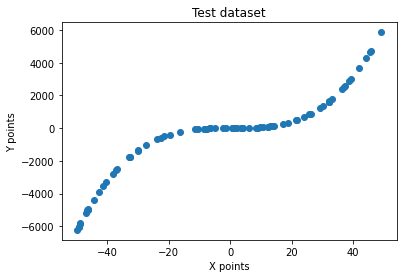

In [4]:
# displaying the test data set 
plt.scatter(X_test,Y_test)
plt.xlabel('X points')
plt.ylabel('Y points')
plt.title('Test dataset')
plt.show()

### Training
In this section, we train the models on the training dataset.

In the following cell, we train each model (i.e. polynomial of a particular degree) 10 times, once on each partition. We run an outer loop ->

   _for i in range(1,21): create_polynomial_regression_model(i)_

which calls a function create_polynomial_regression_model(i) for calculating bias,variance,MSE,irreducible error for each degree i (for 20 degree's).In that function we are calling another loop which train 10 models for that function class on 10 different dataset which we have splitted earlier in X_train and Y_train.
then we use preprocessing.PolynomialFeatures() to extend our dataset according to the degree of plolynomial.
Later on we train our model using all the 10 trianing set in the for loop and store the predicted value for training model for test set in Y_predicted array (i.e. array in array) 

For calculating bias, some basic arithimatic is done according to formula of bias, variance.We got predicted value of every test data point with 10 models we trained for each degree. 
To calculate the bias we took average of all the 10 output values for each degree and applied bias formula on it.
similarly we calculate bias square for each point and then took the average of all 800 points to find final bias.

For variance we calculated mean of squared output and square of means output for every data input point and then subtracted them to calculate variance.

For mean square error i.e.

E[($f$-$\hat{f}$)<sup>2</sup>] = E[$f$<sup>2</sup>] + E[$\hat{f}$<sup>2</sup>] -2.E[$f$]$.$E[$\hat{f}$]

we calculated mean square error for each input point and then took the mean of that for points for average mean.

For irreducible error we calculated irreducible error for each 800 input points and then took mean of that 800 points to calculate irreducible error for each function model class

In [5]:
#function for training data and 
def create_polynomial_regression_model(degree):
    # 10X(elements in training set) array output of each test set for all 10 models
    Y_predicted = []
    
    poly_features = PolynomialFeatures(degree=degree)
    for i in range(10):
        # transforms the existing features to higher degree features.
        X_train_poly = poly_features.fit_transform(X_train[i])
        
        poly_model = LinearRegression()
        poly_model.fit(X_train_poly, Y_train[i])
        
        Y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
#         ax = operator.itemgetter(0)
#         Sorted_array = sorted(zip(X_test,Y_test_predict), ax)
#         X_test, Y_test_predict = zip(*Sorted_array)
        Y_predicted.append(Y_test_predict)
        if(i==1):
            Y_predicted_test_set.append(Y_test_predict)
        
#         plt.scatter(X_test,Y_test)
#         plt.plot(X_test, Y_test_predict)
#         plt.show()
        
        
    Y_predicted_mean = np.mean(Y_predicted,axis=0)
    bias = np.absolute(np.subtract(Y_predicted_mean, Y_test))
    bias_sqr = np.power(bias,2)
    model_bias.append(np.mean(bias))
    model_bias_sqr.append(np.mean(bias_sqr))
    Y_predicted_square = np.square(Y_predicted)
    Y_predicted_square_mean = np.mean(Y_predicted_square,axis=0)
    Y_predicted_mean_square = np.square(Y_predicted_mean)
    Variance = np.subtract(Y_predicted_square_mean , Y_predicted_mean_square)
    model_variance.append(np.mean(Variance))
    Y_test_square = np.square(Y_test)
    Y_2ab_factor = np.multiply(Y_test,Y_predicted_mean)
    Y_2ab_factor = np.multiply(Y_2ab_factor,-2)
    Y_irreducible_error = np.add(Y_test_square,Y_predicted_square_mean)
    Y_irreducible_error = np.add(Y_irreducible_error,Y_2ab_factor)
    model_mean_sqr_err.append(np.mean(Y_irreducible_error))
    Y_irreducible_error = np.subtract(Y_irreducible_error,bias_sqr)
    Y_irreducible_error = np.subtract(Y_irreducible_error,Variance)
    model_irreducible_err.append(np.mean(Y_irreducible_error))
    
    
    


In [6]:
for i in range(1,21):
    create_polynomial_regression_model(i)
# TASK - 2 
df = pd.DataFrame({'Degree':Degree,'Bias':model_bias,'variance':model_variance})
df

,Degree,Bias,variance
0,1,819.937274,27151.984278
1,2,810.691675,67008.276991
2,3,65.545025,70587.087913
3,4,73.112131,78597.919665
4,5,71.888672,95260.966333
5,6,68.416421,109729.133709
6,7,70.562224,153932.477382
7,8,71.224691,180150.728264
8,9,70.497697,191665.290876
9,10,76.347480,204869.438773


### Analysis 
Now that we have the plots for the squared bias and variance of each model, we can analyse and
compare their performance.

__Bias__ As the degree of the polynomial hypothesis increases, the function becomes more flexible,
allowing it to better mould itself to fit the training dataset. Hence, the error on the test dataset
also decreases. Because the bias (the average difference between the predicted and actual values)
effectively captures this error, we see a steadily deceasing trend in the bias values with an increase
in degree of the hypothesis function.
The change, however, is not so marked after degree 4-5 which hints at the fact that the data is best
modelled by a degree 4-5 hypothesis, and a further increase in degree of the hypothesis would be
frivolous.

__Variance__ Save for an initial anomaly, the variance of the models shows a general increase with
an increase in the degree of the hypothesis. This is because as the degree of the polynomial
increases and it becomes more flexible, it also becomes more susceptible to minor variations in
the training dataset. Hence, each time the model is trained, the increased flexibility of the highed
degree polynomials causes the coefficients to turn out significantly different due to differences in
the training set. Hence, the high variance on the test dataset.
The degree one hypothesis has an abnormally high variance because the lack of any flexibility at
all causes the models to turn out vastly different from each other as the learning algorithm tries
to fit them to points that vary slightly amongst the different training sets. Because the hypothesis
lacks the flexibility to account for these variations, they cause the entire model to train drastically
differently.

[]

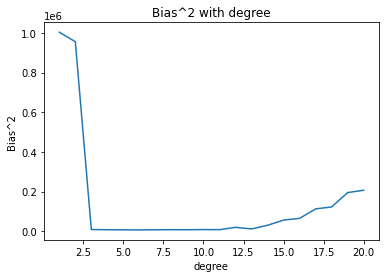

In [7]:
plt.plot(Degree,model_bias_sqr)
plt.title('Bias^2 with degree')
plt.xlabel('degree')
plt.ylabel('Bias^2')
plt.plot()

[]

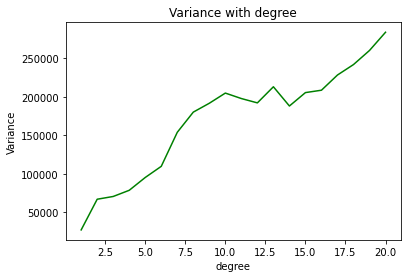

In [8]:
plt.plot(Degree,model_variance,color="green")
plt.title('Variance with degree')
plt.xlabel('degree')
plt.ylabel('Variance')
plt.plot()

## Calculating Irreducible Error

    Degree  Irreducible error           MSE
0        1       9.267751e-11  1.030456e+06
1        2       5.293259e-11  1.022706e+06
2        3      -1.701210e-10  7.905434e+04
3        4      -2.673914e-11  8.595349e+04
4        5      -2.117304e-10  1.021111e+05
5        6       5.989023e-10  1.162168e+05
6        7       2.690285e-10  1.612136e+05
7        8       2.090019e-10  1.877471e+05
8        9       1.882654e-11  1.990545e+05
9       10       7.166818e-11  2.130558e+05
10      11      -1.260560e-10  2.056213e+05
11      12       5.002221e-11  2.115379e+05
12      13       6.516530e-11  2.245761e+05
13      14      -3.502919e-10  2.180275e+05
14      15      -8.058123e-11  2.614350e+05
15      16      -8.903953e-11  2.732862e+05
16      17       3.115019e-10  3.408800e+05
17      18      -2.236902e-10  3.641904e+05
18      19       2.670276e-10  4.549343e+05
19      20      -4.506546e-11  4.904471e+05


[]

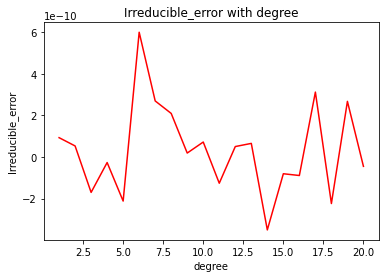

In [9]:
#Task - 3
df = pd.DataFrame({'Degree': Degree,'Irreducible error':model_irreducible_err,'MSE':model_mean_sqr_err})
print(df)
plt.plot(Degree,model_irreducible_err,color="red")
plt.xlabel('degree')
plt.ylabel('Irreducible_error')
plt.title('Irreducible_error with degree')
plt.plot()

An irreducible error is an error that you get not because your model is not correct, but because of the noise in the data you
are training or testing on. Hence, irreducible error doesn't change much with the model i.e our polynomial models from
degree 1 to 20. The order of irreducible error is of $10^{-10}$ which is small and cannot be reducible.And the negative values of irreducible error are due to the floating-point precision error of the python interpreter.

## Plotting Bias <sup>2</sup> − V ariance graph

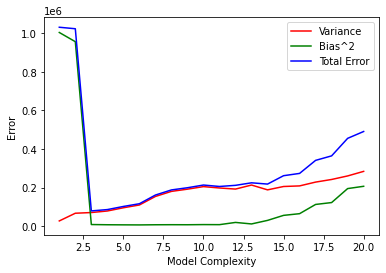

In [10]:
# plt.plot(model_irreducible_err)

plt.plot(Degree, model_variance,color="red",label="Variance")
plt.plot(Degree, model_bias_sqr,color="green",label="Bias^2")
plt.plot(Degree, model_mean_sqr_err,color = "blue",label="Total Error")
plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.legend()
plt.show()


This plot shows the squared bias and variance plotted on the same graph to visualize the BiasVariance Tradeoff. Please note that variance has been scaled to __150__ times the original to make the values of the same order.From the graphs, it is evident that an increase in degree beyond 6 does not bring
much benefit in terms of bias, but just increases the variance for the worse.
Because degree 4 has the least variance amongst degrees 4 to 6, it might be the
best suited model for this case.